In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('airline-passenger-traffic.csv')
data.columns = ['Month','Passengers']

In [3]:
data.head()

,Month,Passengers
0,1949-02,118.0
1,1949-03,132.0
2,1949-04,129.0
3,1949-05,121.0
4,1949-06,135.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       143 non-null    object 
 1   Passengers  139 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [5]:
data['Month'] = pd.to_datetime(data['Month'],format='%Y-%m')
data = data.set_index('Month')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 1949-02-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  139 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [7]:
data.head()

,Passengers
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


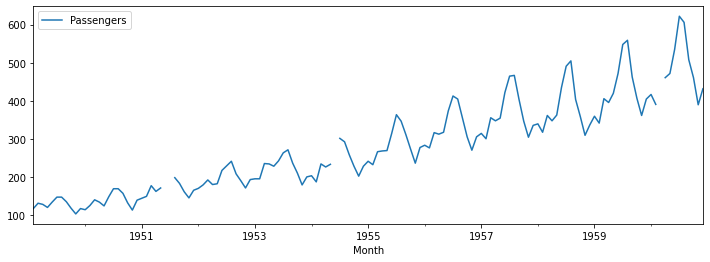

In [8]:
data.plot(figsize=[12,4])
plt.legend(loc='best')
plt.show()

In [9]:
data_1 = pd.read_csv('Metrail+dataset.csv')

In [10]:
data_1.head()

,Month,Travellers('000)
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN


In [11]:
data_12 = data_1.ffill(axis=0)

In [12]:
data_12['Travellers(\'000)'].mean()

1838.685534591195

In [13]:
data_13 = data_1.bfill(axis=0)

In [14]:
data_13['Travellers(\'000)'].mean()

1834.446540880503

In [15]:
data_13['Travellers'] = data_1['Travellers(\'000)'].interpolate(method='linear')

In [16]:
data_13.head(6)

,Month,Travellers('000),Travellers
0,Jan-91,1724.0,1724.0
1,Feb-91,1638.0,1638.0
2,Mar-91,1987.0,1987.0
3,Apr-91,1825.0,1825.0
4,May-91,1879.0,1852.0
5,Jun-91,1879.0,1879.0


In [17]:
data_13['Travellers'].mean()

1836.566037735849

In [18]:
data.head()

,Passengers
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


In [19]:
import seaborn as sns

<AxesSubplot:xlabel='Passengers'>

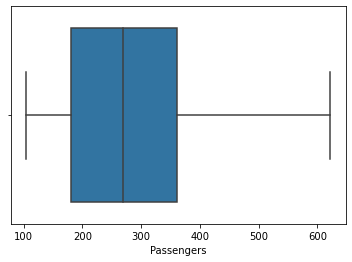

In [20]:
sns.boxplot(data.Passengers)

In [21]:
data['Passengers'] = data.Passengers.interpolate(method='linear')

In [22]:
data.isnull().sum()

Passengers    0
dtype: int64

In [23]:
from pylab import rcParams
import statsmodels.api as sm 
rcParams['figure.figsize'] = 12,8

In [24]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive')

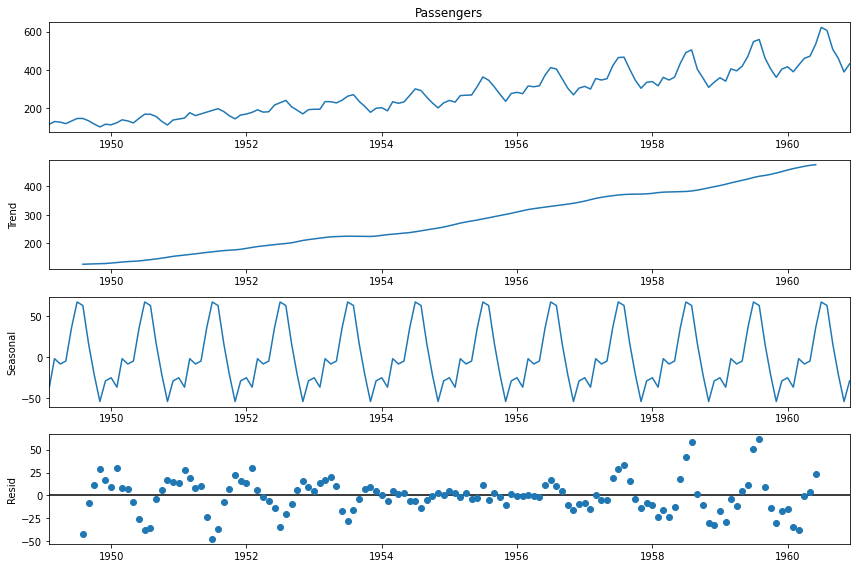

In [25]:
fig = decomposition.plot()

In [26]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative')

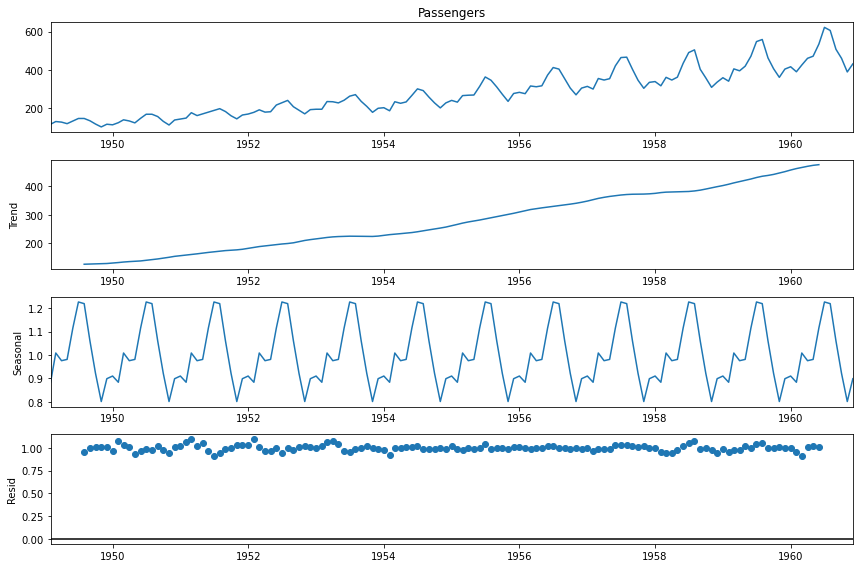

In [27]:
fig = decomposition.plot()

## Build and evaluate time series forecast

In [28]:
train_len=120
train = data[:train_len]
test = data[train_len:]

In [29]:
train.shape

(120, 1)

In [30]:
test.shape

(23, 1)

In [31]:
## Naive method

y_hat_naive = test.copy()

In [32]:
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

In [33]:
y_hat_naive.head()

,Passengers,naive_forecast
Month,,
1959-02-01,342.0,360.0
1959-03-01,406.0,360.0
1959-04-01,396.0,360.0
1959-05-01,420.0,360.0
1959-06-01,472.0,360.0


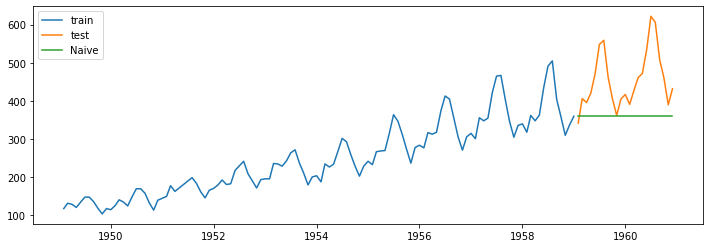

In [34]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label = 'train')
plt.plot(test['Passengers'], label = 'test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive')
plt.legend(loc='best')
plt.show()

## Simple average Method

In [35]:
y_hat_avg = test.copy()
y_hat_avg['Avg_forecast'] = train['Passengers'].mean()

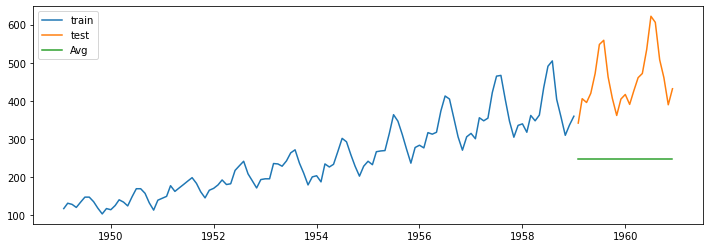

In [36]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label = 'train')
plt.plot(test['Passengers'], label = 'test')
plt.plot(y_hat_avg['Avg_forecast'], label='Avg')
plt.legend(loc='best')
plt.show()

In [ ]:
train_1 = train.copy()
test_1 = test.copy()

In [37]:
## calculate RSME and MAPE 

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [39]:
rsme = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)

In [40]:
rsme

121.4

In [41]:
mape = mean_absolute_percentage_error(test['Passengers'], y_hat_naive['naive_forecast']).round(2)

In [42]:
mape

0.2

In [43]:
rsme_avg = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['Avg_forecast'])).round(2)
mape_avg = mean_absolute_percentage_error(test['Passengers'], y_hat_avg['Avg_forecast']).round(2)

In [44]:
rsme_avg, mape_avg

(221.2, 0.44)

In [ ]:
##Sample 

In [45]:
data_new = pd.read_csv('exchange-rate-twi (2).csv')

In [46]:
data_new.head()

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


<AxesSubplot:xlabel='Month'>

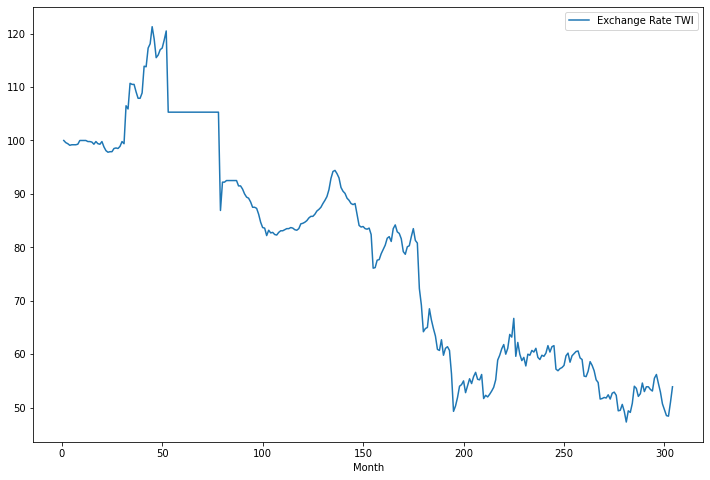

In [47]:
data_new.set_index('Month',inplace=True)
data_new.plot()

In [48]:
train_1 = data_new[:212]
test_1 = data_new[212:]

In [49]:
train_1.shape, test_1.shape

((212, 1), (92, 1))

In [50]:
train_1.head()

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2


In [51]:
train_1['Exchange Rate TWI'].mean()

88.32547169811328

In [52]:
train_1['Exchange Rate TWI'][212-1]

52.3

In [53]:
test_1['Avg'] = train_1['Exchange Rate TWI'].mean()
test_1['naive'] = train_1['Exchange Rate TWI'][212-1]
test_1['sma'] = test_1['Exchange Rate TWI'].rolling(window=12).mean()

In [54]:
test_1.head(5)

,Exchange Rate TWI,Avg,naive,sma
Month,,,,
213,52.5,88.325472,52.3,NaN
214,53.1,88.325472,52.3,NaN
215,53.8,88.325472,52.3,NaN
216,55.2,88.325472,52.3,NaN
217,58.9,88.325472,52.3,NaN


In [55]:
rsme_avg = np.sqrt(mean_squared_error(test_1['Exchange Rate TWI'], test_1['Avg'] )).round(2)
mape_avg = mean_absolute_percentage_error(test_1['Exchange Rate TWI'], test_1['Avg'] ).round(2)

In [56]:
rsme_avg, mape_avg

(32.42, 0.58)

In [59]:
y_hat_sma = test_1.copy()
y_hat_sma['Moving'] = test_1['Exchange Rate TWI'].rolling(12).mean()

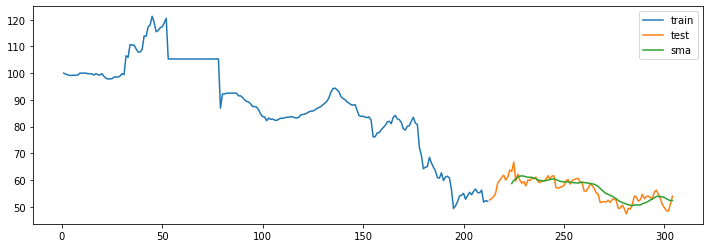

In [60]:
plt.figure(figsize=(12,4))
plt.plot(train_1['Exchange Rate TWI'], label = 'train')
plt.plot(test_1['Exchange Rate TWI'], label = 'test')
plt.plot(y_hat_sma['Moving'], label='sma')
plt.legend(loc='best')
plt.show()

In [61]:
train_len

120

In [62]:
def plot_rolling(window=12):
    y_hat_sma = data.copy()
    y_hat_sma['sma_forecast'] = data['Passengers'].rolling(window=window).mean()
    y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
    plt.figure(figsize=(12,4))
    plt.plot(data[:train_len], label='Train')
    plt.plot(data[train_len:], label = 'Test')
    plt.plot(y_hat_sma['sma_forecast'], label = 'SMA')
    plt.legend(loc='best')
    plt.show()

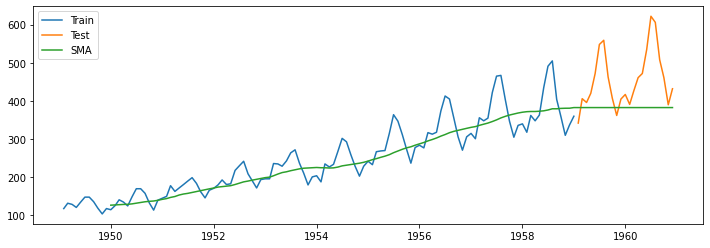

In [63]:
plot_rolling()

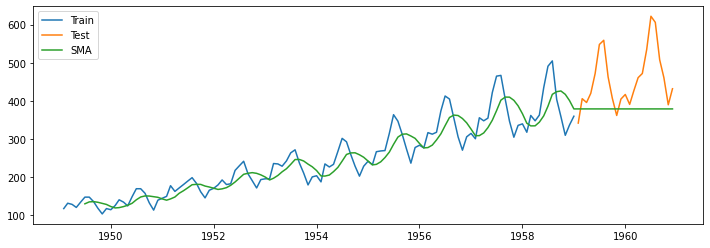

In [64]:
plot_rolling(6)

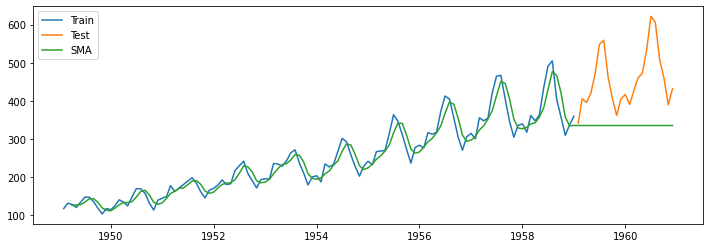

In [65]:
plot_rolling(3)

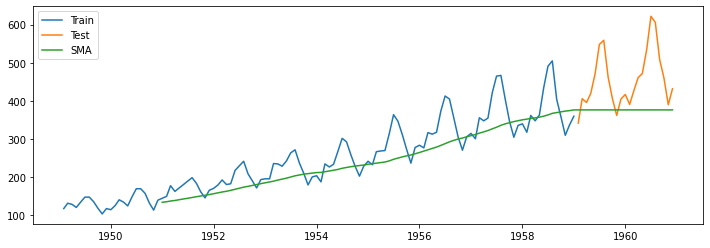

In [66]:
plot_rolling(24)

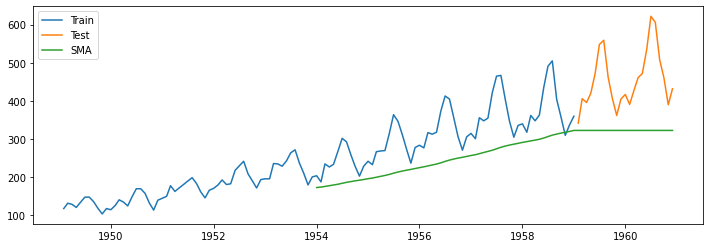

In [67]:
plot_rolling(60)

In [68]:
## Analysis for questions

In [69]:
data_new.shape

(304, 1)

In [70]:
data_new.head()

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2


In [71]:
y_hat_sma = data_new.copy()
y_hat_sma['sma_forecast'] = data_new['Exchange Rate TWI'].rolling(window=12).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

In [72]:
y_hat_sma.head(15)

,Exchange Rate TWI,sma_forecast
Month,,
1,100.0,NaN
2,99.6,NaN
3,99.4,NaN
4,99.1,NaN
5,99.2,NaN
6,99.2,NaN
7,99.2,NaN
8,99.3,NaN
9,100.0,NaN


In [73]:
rsme_sma = np.sqrt(mean_squared_error(y_hat_sma['Exchange Rate TWI'][212:], y_hat_sma['sma_forecast'][212:])).round(2)
mape_sma = mean_absolute_percentage_error(y_hat_sma['Exchange Rate TWI'][212:], y_hat_sma['sma_forecast'][212:]).round(2)

In [74]:
rsme_sma, mape_sma

(27.56, 0.49)

In [75]:
#test_new['sma_forecast'] = data_new['Exchange Rate TWI'].rolling(window=12).mean()
#test_new['sma_forecast'][212:] = test_new['sma_forecast'][211]

In [76]:
#data_new.set_index('Month', inplace=True)

In [77]:
train_new = data_new[:212]
test_new = data_new[212:]

In [78]:
y_hat_sma = test_new.copy()
y_hat_sma['moving_avg'] = test_new['Exchange Rate TWI'].rolling(window=12).mean()

In [79]:
y_hat_sma.head()

,Exchange Rate TWI,moving_avg
Month,,
213,52.5,NaN
214,53.1,NaN
215,53.8,NaN
216,55.2,NaN
217,58.9,NaN


In [80]:
data_1 = pd.read_csv('exchange-rate-twi.csv')

In [81]:
train_len=212

In [82]:
train_2 = data[:212]
test_2 = data[212:]

In [83]:
data_1 = pd.read_csv('exchange-rate-twi.csv')
data_1.set_index('Month',inplace=True)

In [84]:
train_len=212
train_2 = data_1[:train_len]
test_2 = data_1[train_len:]

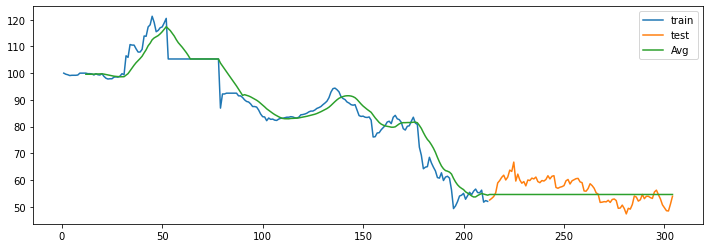

In [85]:
y_hat_avg = data_1.copy()
y_hat_avg['Avg_forecast'] = train_2['Exchange Rate TWI'].rolling(12).mean()
y_hat_avg['Avg_forecast'][train_len:] = y_hat_avg['Avg_forecast'][train_len-1]

#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train_2['Exchange Rate TWI'], label = 'train')
plt.plot(test_2['Exchange Rate TWI'], label = 'test')
plt.plot(y_hat_avg['Avg_forecast'], label='Avg')
plt.legend(loc='best')
plt.show()

In [86]:
rsme = np.sqrt(mean_squared_error(test_2['Exchange Rate TWI'], y_hat_avg['Avg_forecast'][212:])).round(2)
mape = mean_absolute_percentage_error(test_2['Exchange Rate TWI'], y_hat_avg['Avg_forecast'][212:])*100

In [87]:
rsme, mape

(4.57, 6.890608711900493)

In [88]:
# 12 -> (4.57, 6.890608711900493)
# 6 -> (4.58, 6.896414762601088)
# 3 -> (5.1, 7.316297873991047)

## Simple Exponential Smoothing 

In [89]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [90]:
#data = pd.read_csv('airline-passenger-traffic.csv')
#data.columns = ['Month','Passengers']

In [91]:
#train_len=120
#train = data[:train_len]
#test = data[train_len:]

In [92]:
train.shape, test.shape

((120, 1), (23, 1))

In [93]:
train.head()

,Passengers
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


In [95]:
model = SimpleExpSmoothing(train_2['Exchange Rate TWI'])

/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [96]:
model_fit=model.fit(smoothing_level=0.2, optimized=False)

In [97]:
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 100.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [98]:
y_hat_ses = test_2.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(100)

/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [99]:
y_hat_ses.head()

,Exchange Rate TWI,ses_forecast
Month,,
213,52.5,53.780005
214,53.1,53.780005
215,53.8,53.780005
216,55.2,53.780005
217,58.9,53.780005


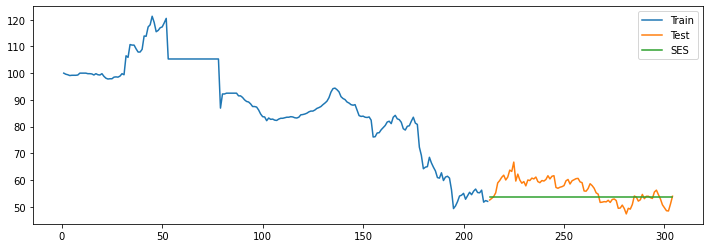

In [100]:
### Plot train test and forecast
plt.figure(figsize=(12,4))
plt.plot(train_2['Exchange Rate TWI'], label='Train')
plt.plot(test_2['Exchange Rate TWI'], label = 'Test')
plt.plot(y_hat_ses['ses_forecast'], label = 'SES')
plt.legend(loc='best')
plt.show()

In [101]:
rsme_ses = np.sqrt(mean_squared_error(test_2['Exchange Rate TWI'], y_hat_ses['ses_forecast'])).round(2)
mape_ses = mean_absolute_percentage_error(test_2['Exchange Rate TWI'], y_hat_ses['ses_forecast']).round(2)

In [102]:
rsme_ses, mape_ses

(4.9, 0.07)

In [103]:
al, rs, ma= [],[],[]

In [106]:
def sme(alpha=0.2):
    model = SimpleExpSmoothing(train_2['Exchange Rate TWI'])
    model_fit=model.fit(smoothing_level=alpha, optimized=False)
    y_hat_ses = test_2.copy()
    y_hat_ses['ses_forecast'] = model_fit.forecast(100)
    plt.figure(figsize=(12,4))
    plt.plot(train_2['Exchange Rate TWI'], label='Train')
    plt.plot(test_2['Exchange Rate TWI'], label = 'Test')
    plt.plot(y_hat_ses['ses_forecast'], label = 'SES')
    plt.legend(loc='best')
    plt.show()
    rsme_ses = np.sqrt(mean_squared_error(test_2['Exchange Rate TWI'], y_hat_ses['ses_forecast'])).round(2)
    mape_ses = mean_absolute_percentage_error(test_2['Exchange Rate TWI'], y_hat_ses['ses_forecast']).round(2)
    print(rsme_ses, mape_ses)
    al.append(alpha)
    rs.append(rsme_ses)
    ma.append(mape_ses)

/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


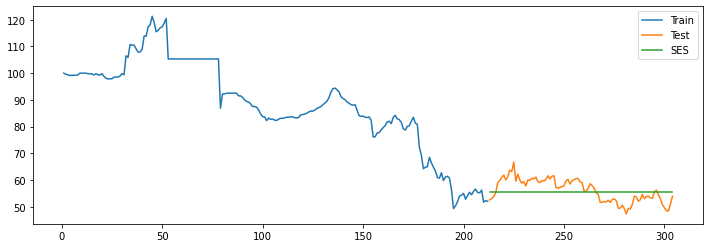

4.31 0.07


/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


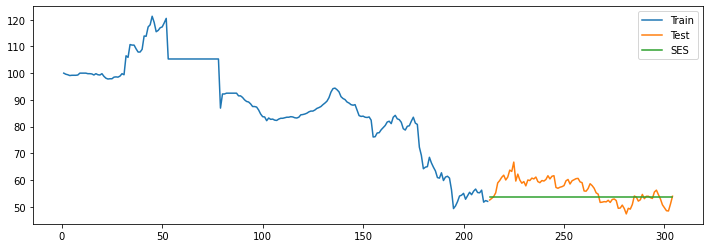

/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


4.9 0.07


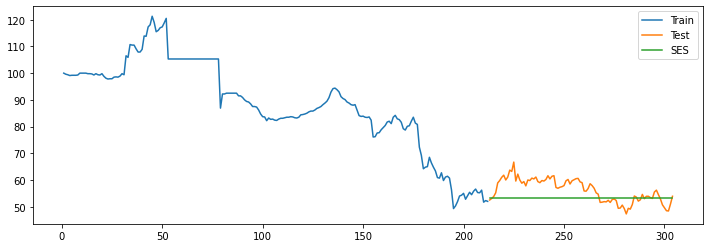

5.19 0.07


/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


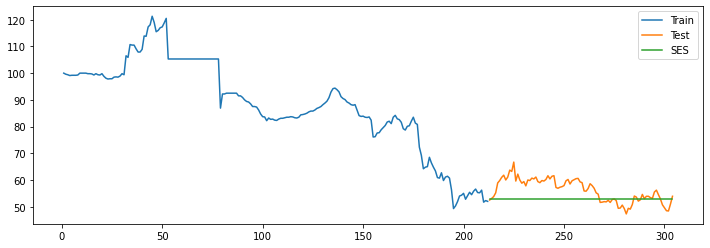

5.43 0.08


/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


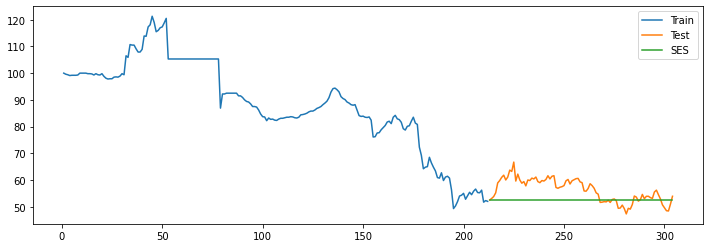

5.64 0.08


/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


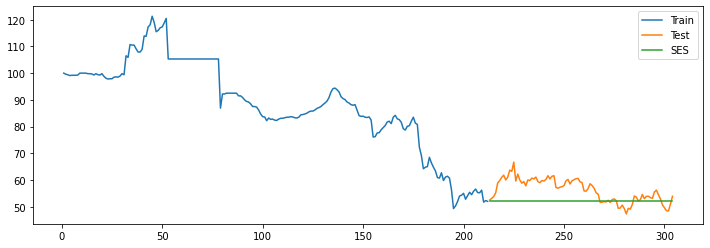

5.78 0.08


/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


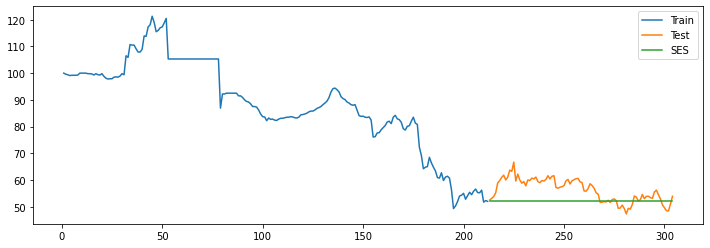

5.88 0.08


/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


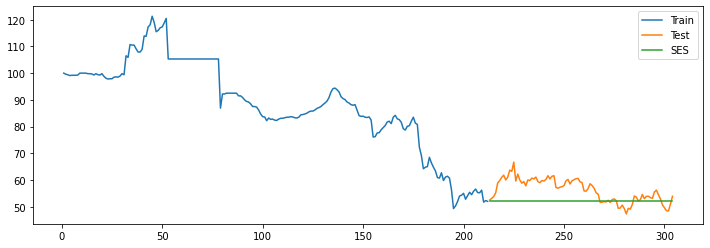

5.93 0.08


/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


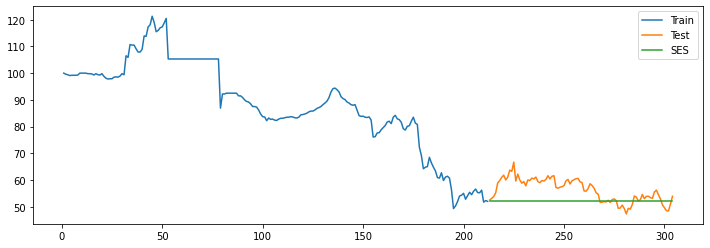

5.96 0.08


In [107]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    sme(i)

In [108]:
dic = {'alpha' : al, 'rsme':rs, 'mape': ma}

In [109]:
df = pd.DataFrame(dic)

In [110]:
df.head(10)

,alpha,rsme,mape
0,0.1,4.31,0.07
1,0.2,4.90,0.07
2,0.3,5.19,0.07
3,0.4,5.43,0.08
4,0.5,5.64,0.08
5,0.6,5.78,0.08
6,0.7,5.88,0.08
7,0.8,5.93,0.08
8,0.9,5.96,0.08


In [111]:
df.set_index('alpha', inplace=True)

In [112]:
df.head(10)

,rsme,mape
alpha,,
0.1,4.31,0.07
0.2,4.90,0.07
0.3,5.19,0.07
0.4,5.43,0.08
0.5,5.64,0.08
0.6,5.78,0.08
0.7,5.88,0.08
0.8,5.93,0.08
0.9,5.96,0.08


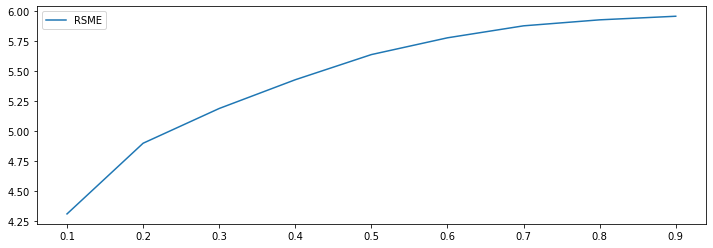

In [114]:
plt.figure(figsize=(12,4))
plt.plot(df['rsme'], label='RSME')
#plt.plot(df['mape']*100, label='MAPE')
plt.legend(loc='best')
plt.show()

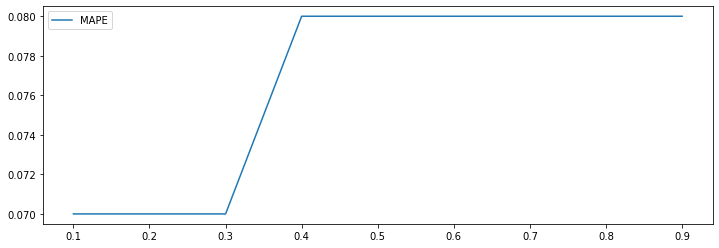

In [115]:
plt.figure(figsize=(12,4))
plt.plot(df['mape'], label='MAPE')
plt.legend(loc='best')
plt.show()

/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


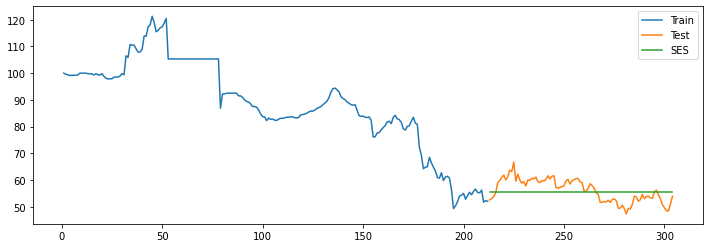

4.31 0.07


In [116]:
sme(0.1)

In [117]:
train.head()

,Passengers
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


In [118]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [120]:
model = ExponentialSmoothing(np.array(train['Passengers']), 
                             seasonal_periods=12, 
                             trend='additive', 
                             seasonal=None)
model_fit = model.fit(smoothing_level=0.2, 
                      smoothing_slope=0.01, 
                      optimized=False)

In [121]:
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 118.0,
 'initial_trend': 14.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [122]:
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(23)

In [123]:
y_hat_holt.head()

,Passengers,holt_forecast
Month,,
1959-02-01,342.0,402.172492
1959-03-01,406.0,407.868706
1959-04-01,396.0,413.564919
1959-05-01,420.0,419.261133
1959-06-01,472.0,424.957347


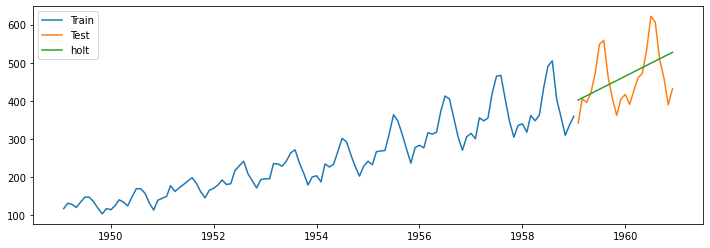

In [124]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_holt['holt_forecast'], label = 'holt')
plt.legend(loc='best')
plt.show()

In [125]:
rsme_holt = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
mape_holt = mean_absolute_percentage_error(test['Passengers'], y_hat_holt['holt_forecast']).round(2)

In [126]:
rsme_holt, mape_holt

(71.27, 0.13)

In [127]:
#Holt-Winter Exponential Smoothing Technique

In [128]:
y_hat_hwa = test.copy()

In [129]:
model = ExponentialSmoothing(np.array(train['Passengers']), 
                             seasonal_periods=12, 
                             trend='additive', 
                             seasonal='additive')
model_fit = model.fit(optimized=True)
model_fit.params

{'smoothing_level': 0.2359766091027566,
 'smoothing_trend': 4.666760183878598e-10,
 'smoothing_seasonal': 0.7640233887899771,
 'damping_trend': nan,
 'initial_level': 201.01357481810513,
 'initial_trend': 2.3112381866160874,
 'initial_seasons': array([ -85.33401064,  -72.82392757,  -77.91025104,  -86.61511368,
         -72.47813071,  -60.20626826,  -62.14878842,  -76.2409964 ,
         -95.10339603, -109.78599376,  -93.642711  ,  -96.76381966]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [130]:
y_hat_hwa['hwa_forecast'] = model_fit.forecast(23)

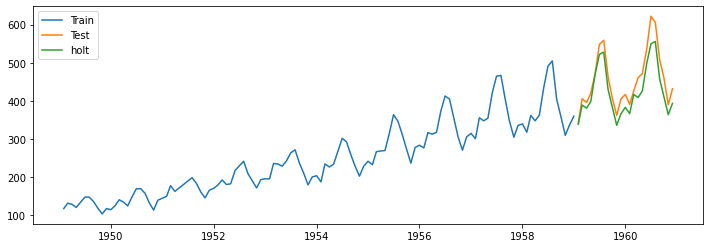

In [131]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_hwa['hwa_forecast'], label = 'holt')
plt.legend(loc='best')
plt.show()

In [132]:
rsme_hwa = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hwa_forecast'])).round(2)
mape_hwa = mean_absolute_percentage_error(test['Passengers'], y_hat_hwa['hwa_forecast']).round(2)

In [133]:
rsme_hwa,mape_hwa

(35.7, 0.07)

In [134]:
model = ExponentialSmoothing(np.array(train['Passengers']), 
                             seasonal_periods=12, 
                             trend='multiplicative', 
                             seasonal='multiplicative')
model_fit = model.fit(optimized=True)
model_fit.params

{'smoothing_level': 0.40647781540042016,
 'smoothing_trend': 9.848342693729799e-09,
 'smoothing_seasonal': 0.5935221822785256,
 'damping_trend': nan,
 'initial_level': 177.74059252455868,
 'initial_trend': 1.0098968687275507,
 'initial_seasons': array([0.6574391 , 0.7290706 , 0.69181693, 0.63349873, 0.69015521,
        0.75161321, 0.74610205, 0.67707507, 0.58568944, 0.51807745,
        0.6057332 , 0.60907166]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [135]:
y_hat_hwa['hwm_forecast'] = model_fit.forecast(23)

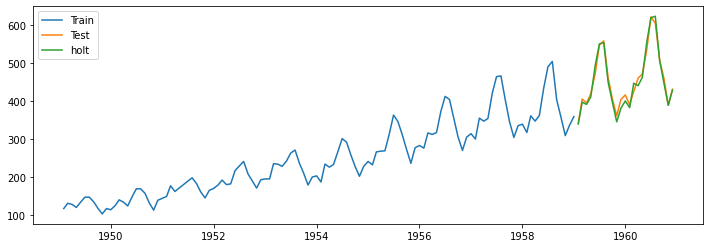

In [136]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_hwa['hwm_forecast'], label = 'holt')
plt.legend(loc='best')
plt.show()

In [137]:
rsme_hwm = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hwm_forecast'])).round(2)
mape_hwm = mean_absolute_percentage_error(test['Passengers'], y_hat_hwa['hwm_forecast']).round(2)

In [138]:
rsme_hwm , mape_hwm

(12.81, 0.02)

In [139]:
def myDateConv(tt):
    sep = tt[2]
    if sep == '-':
        return pd.to_datetime(tt, format='%d-%m-%Y').strftime("%Y-%m-%d")
    else:
        return pd.to_datetime(tt, format='%m/%d/%Y').strftime("%Y-%m-%d")

In [140]:
tempra = pd.read_csv('Daily+temperature+data.csv', converters={'Date': myDateConv})
tempra.set_index('Date', inplace=True)

In [141]:
tempra.head()

,Temperature(Min)
Date,
2017-01-01,14.3
2017-02-01,17.4
2017-03-01,18.5
2017-04-01,16.8
2017-05-01,11.5


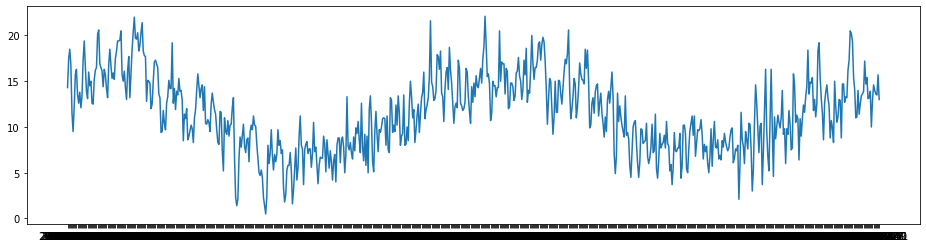

In [142]:
plt.figure(figsize=(16,4))
plt.plot(tempra['Temperature(Min)'])

In [143]:
train_t = tempra[:511]
test_t = tempra[511:]

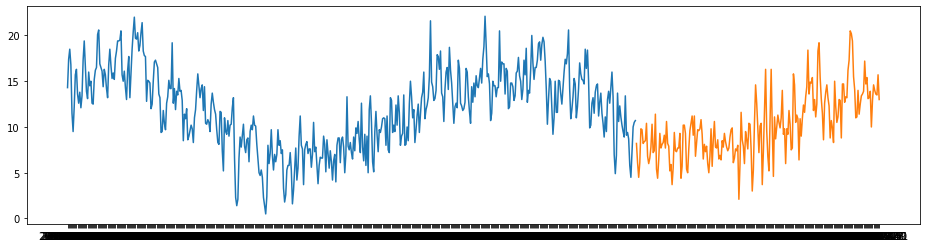

In [144]:
plt.figure(figsize=(16,4))
plt.plot(train_t['Temperature(Min)'])
plt.plot(test_t['Temperature(Min)'])

In [160]:
model = ExponentialSmoothing(np.array(train_t['Temperature(Min)']), 
                             seasonal_periods=150, 
                             trend='additive', 
                             seasonal=None)
model_fit = model.fit(optimized=True)
model_fit

In [161]:
y_hat_holt_new = test_t.copy()
y_hat_holt_new['holt_forecast'] = model_fit.forecast(len(test_t))

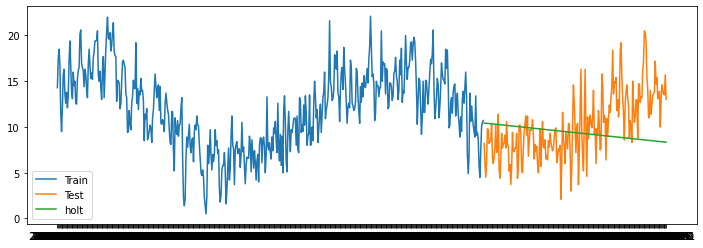

In [162]:
plt.figure(figsize=(12,4))
plt.plot(train_t['Temperature(Min)'], label='Train')
plt.plot(test_t['Temperature(Min)'], label = 'Test')
plt.plot(y_hat_holt_new['holt_forecast'], label = 'holt')
plt.legend(loc='best')
plt.show()

In [163]:
np.sqrt(mean_squared_error(test_t['Temperature(Min)'], y_hat_holt_new['holt_forecast'])).round(2)


3.94

In [164]:
mean_absolute_percentage_error(test_t['Temperature(Min)'], y_hat_holt_new['holt_forecast']).round(2) * 100

35.0

In [165]:
model = ExponentialSmoothing(np.array(train_t['Temperature(Min)']), 
                             seasonal_periods=30, 
                             trend='additive', 
                             seasonal='additive')
model_fit = model.fit(optimized=True)
model_fit.params

{'smoothing_level': 0.6742835219348637,
 'smoothing_trend': 8.313212172012627e-08,
 'smoothing_seasonal': 2.510393054607921e-08,
 'damping_trend': nan,
 'initial_level': 12.40177379195609,
 'initial_trend': -0.009843995952546581,
 'initial_seasons': array([3.06539835, 2.57080966, 2.59243402, 3.10214789, 2.5765915 ,
        2.39817777, 2.50802753, 3.15910329, 3.31014344, 2.99059758,
        3.07105787, 2.81625778, 1.82025475, 2.77134157, 2.96949261,
        2.9971124 , 1.94822696, 2.75810044, 2.45622769, 1.77793046,
        1.99963807, 2.83311057, 1.66066021, 0.96473214, 1.8275554 ,
        1.83153438, 2.10023085, 2.71593008, 3.23164569, 3.24715024]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [166]:
y_hat_holt_new = test_t.copy()
y_hat_holt_new['holt_forecast'] = model_fit.forecast(len(test_t))

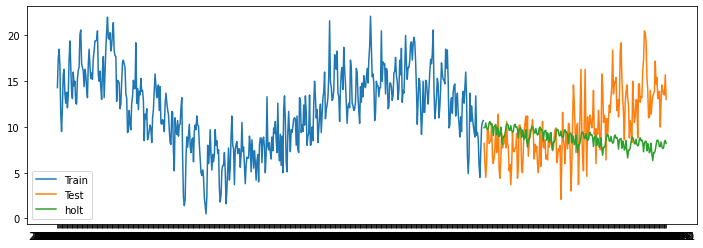

In [167]:
plt.figure(figsize=(12,4))
plt.plot(train_t['Temperature(Min)'], label='Train')
plt.plot(test_t['Temperature(Min)'], label = 'Test')
plt.plot(y_hat_holt_new['holt_forecast'], label = 'holt')
plt.legend(loc='best')
plt.show()

In [168]:
np.sqrt(mean_squared_error(test_t['Temperature(Min)'], y_hat_holt_new['holt_forecast'])).round(2)

4.14

In [169]:
mean_absolute_percentage_error(test_t['Temperature(Min)'], y_hat_holt_new['holt_forecast']).round(2) * 100

34.0

<AxesSubplot:xlabel='Month'>

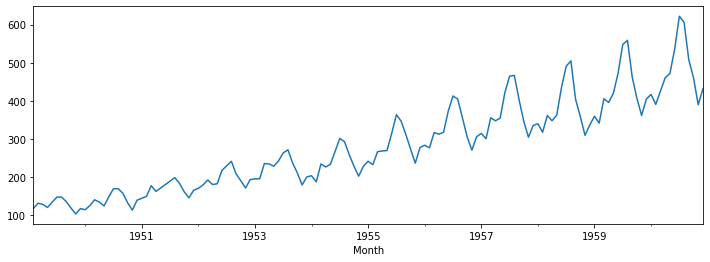

In [170]:
plt.figure(figsize=(12,4))
data['Passengers'].plot()

In [171]:
from statsmodels.tsa.stattools import adfuller, kpss

In [172]:
adf_test = adfuller(data['Passengers'])

In [173]:
adf_test[0]

0.8662877034110212

In [174]:
adf_test[4]['5%']

-2.8842185101614626

In [175]:
adf_test[1]

0.9926342166999335

In [176]:
#p-value is greater than 0.05, reject the null hypothesis. Non-stationarity 

In [177]:
#KPSS test

In [178]:
kpss_test = kpss(data['Passengers'])

/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [179]:
kpss_test

(1.0448401652734178,
 0.01,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [180]:
kpss_test[1]

0.01

In [181]:
#Exchange Rate

<AxesSubplot:xlabel='Month'>

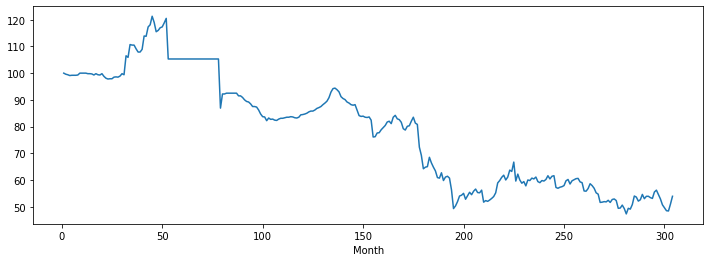

In [182]:
plt.figure(figsize=(12,4))
data_1['Exchange Rate TWI'].plot()

In [183]:
adf_test = adfuller(data_1['Exchange Rate TWI'])
kpss_test = kpss(data_1['Exchange Rate TWI'])

/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [184]:
adf_test[1], kpss_test[1]

(0.8175106426685048, 0.01)

In [185]:
kpss_test[0]

1.7258967599333663

In [186]:
## BOX-COX transformation

In [187]:
from scipy.stats import boxcox

In [197]:
data_boxcox = pd.Series(boxcox(data['Passengers'], lmbda=0), index= data.index)

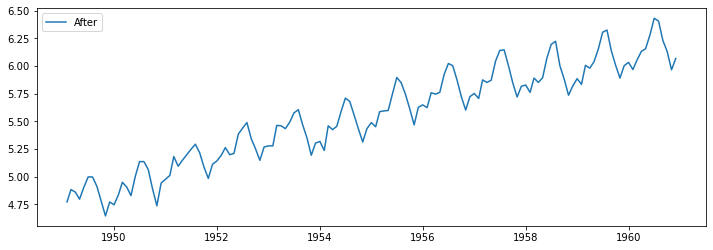

In [198]:
plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label = 'After')
plt.legend(loc='best')
plt.show()


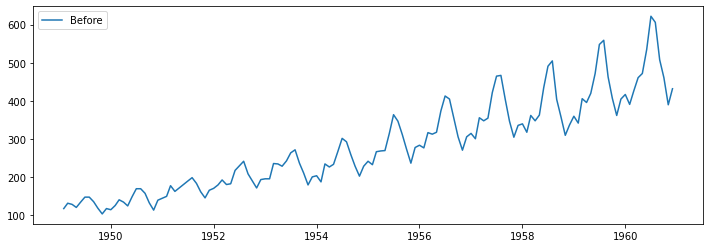

In [199]:
plt.figure(figsize=(12,4))
plt.plot(data, label = 'Before')
plt.legend(loc='best')
plt.show()

In [200]:
## differencing

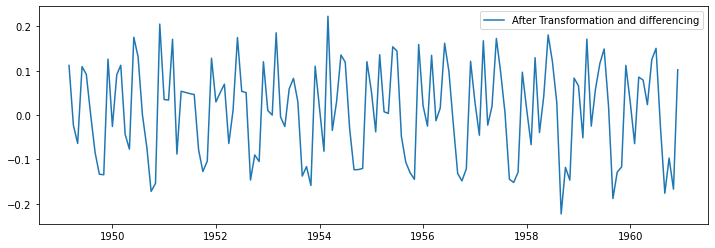

In [201]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index= data.index)
data_boxcox_diff.dropna(inplace=True)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label = 'After Transformation and differencing')
plt.legend(loc='best')
plt.show()

In [202]:
adf_test_new = adfuller(data_boxcox_diff)
kpss_test_new = kpss(data_boxcox_diff)

adf_test_new[1], kpss_test_new[1]

/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.01640155483473491, 0.1)

In [203]:
#ACF Plot

In [204]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

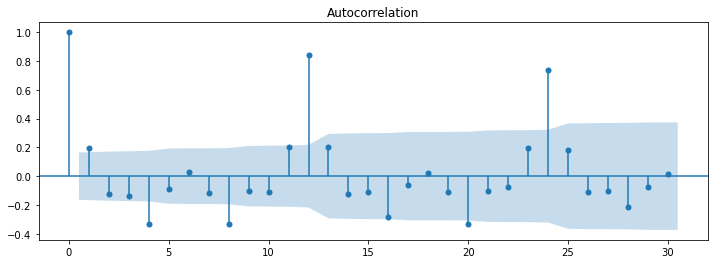

In [205]:
plt.figure(figsize=(12,4))
acf = plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

In [206]:
#PACF

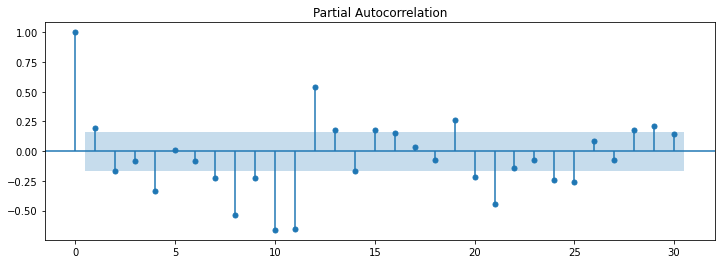

In [207]:
plt.figure(figsize=(12,4))
acf = plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

In [208]:
#split data

In [209]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

train_data_boxcox_diff = data_boxcox_diff[:train_len]
test_data_boxcox_diff = data_boxcox_diff[train_len:]

In [210]:
from statsmodels.tsa.arima_model import ARIMA

In [211]:
model = ARIMA(train_data_boxcox_diff, order=(1,0,0))
model_fit = model.fit()
print(model_fit.params)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.42624D-01    |proj g|=  6.46809D-02

At iterate    5    f= -8.42660D-01    |proj g|=  5.16809D-05

At iterate   10    f= -8.42660D-01    |proj g|=  3.33067D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     48      2     0     0   3.331D-08  -8.427D-01
  F = -0.84265954602034854     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
const      0.009478
ar.L1.y    0.197672
dtype: float64


/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [212]:
#Recover Original TS forecast

In [213]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),
                                                        data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

In [214]:
y_hat_ar.head()

Month
1949-03-01 00:00:00    0.112117
1949-04-01 00:00:00    -0.02299
1949-05-01 00:00:00   -0.064022
1949-06-01 00:00:00    0.109484
1949-07-01 00:00:00    0.091937
dtype: object

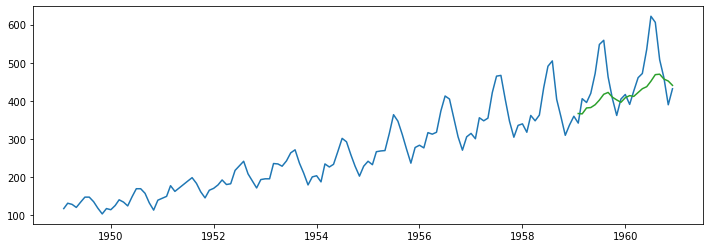

In [215]:
plt.figure(figsize=(12,4))
plt.plot(data['Passengers'][:train_len], label='Train')
plt.plot(data['Passengers'][train_len:], label = 'Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label = 'AR')
#plt.show()

In [219]:
#rsme_ar = np.sqrt(mean_squared_error(data['Passengers'][train_len:], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
#mape_ar = mean_absolute_percentage_error(test['Passengers'], y_hat_ar['ar_forecast'][test.index.min():]).round(2)

In [220]:
# Moving Average Method (MA)

In [222]:
model = ARIMA(train_data_boxcox_diff, order=(0,0,1))
model_fit = model.fit()
print(model_fit.params)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.50422D-01    |proj g|=  4.45904D-03

At iterate    5    f= -8.50422D-01    |proj g|=  2.88658D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     11      1     0     0   2.887D-07  -8.504D-01
  F = -0.85042225370242674     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
const      0.009609
ma.L1.y    0.276731
dtype: float64


/Users/prashikbansod/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


In [223]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

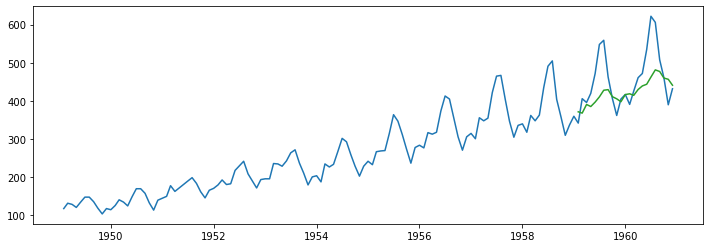

In [224]:
plt.figure(figsize=(12,4))
plt.plot(data['Passengers'][:train_len], label='Train')
plt.plot(data['Passengers'][train_len:], label = 'Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label = 'MA')
#plt.show()